In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.size"] = 10
plt.rcParams['pdf.fonttype'] = 42
df = pd.read_csv("Madison.csv")
df.head()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Calibri'

d:\搜狗高速下载\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import sqlite3
conn = sqlite3.connect('df.db')
df.to_sql("df", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook

def qry(sql,a):
    return pd.read_sql(sql,a)

In [3]:
con12=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">0 and "POSTSPD1"<=25 and "POSTSPD2">0 and "POSTSPD2"<=25
GROUP BY "INJSVR"
""",conn)

con12

,INJSVR,count()
0,None,19646
1,A,334
2,B,2131
3,C,4691
4,K,6


In [4]:
con13=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=30 and "POSTSPD1"<=40 and "POSTSPD2">=30 and "POSTSPD2"<=40
GROUP BY "INJSVR"
""",conn)

con13

,INJSVR,count()
0,None,22659
1,A,382
2,B,2914
3,C,7907
4,K,25


In [5]:
con14=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=45 and "POSTSPD1"<=55 and "POSTSPD2">=45 and "POSTSPD2"<=55
GROUP BY "INJSVR"
""",conn)

con14

,INJSVR,count()
0,None,6271
1,A,155
2,B,819
3,C,2266
4,K,14


In [6]:
con15=qry("""
SELECT "INJSVR",count()
FROM df
WHERE "POSTSPD1">=60 and "POSTSPD2">=60
GROUP BY "INJSVR"
""",conn)

con15

,INJSVR,count()
0,None,1699
1,A,44
2,B,218
3,C,432
4,K,9


In [7]:
import math
data={"0-25":[(6/2471)*100,(334/2471)*100,(2131/2471)*100],"30-40":[(25/3321)*100,(382/3321)*100,(2914/3321)*100],"45-55":[(14/988)*100,(155/988)*100,(819/988)*100],">60":[(9/271)*100,(44/271)*100,(218/271)*100]}
df=pd.DataFrame(data,index=["Fatal","In-capacitating","Non-Incapacitating"])
df1=df.transpose()
print(df1)

          Fatal  In-capacitating  Non-Incapacitating
0-25   0.242817        13.516795           86.240389
30-40  0.752785        11.502559           87.744655
45-55  1.417004        15.688259           82.894737
>60    3.321033        16.236162           80.442804


In [8]:
import math
data={"0-25":[0.12*10,1.81,math.log(9.73)],"30-40":[0.16*10,1.64,math.log(9.55)],"45-55":[0.34*10,1.94,math.log(9.5)],">60":[0.35*10,1.87,math.log(9.11)]}
df=pd.DataFrame(data,index=["Fatal","In-capacitating","Non-Incapacitating"])
df

,0-25,30-40,45-55,>60
Fatal,1.200000,1.600000,3.400000,3.500000
In-capacitating,1.810000,1.640000,1.940000,1.870000
Non-Incapacitating,2.275214,2.256541,2.251292,2.209373


d:\搜狗高速下载\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


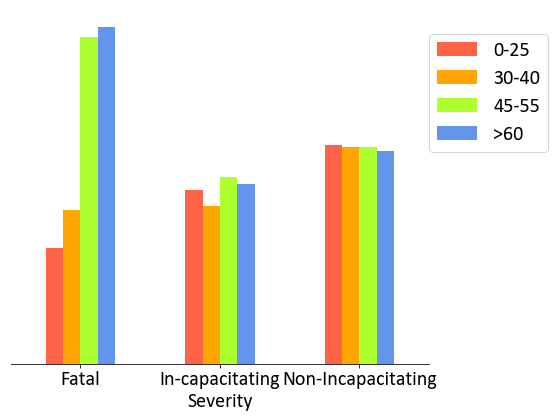

In [9]:
color=["tomato","orange","greenyellow","cornflowerblue"]
ax3=df.plot.bar(colors=color,rot=0,fontsize=20)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax3.set_xlabel("Severity",fontsize=20)
ax3.legend(loc=[1, 0.6],fontsize=20)
plt.yticks([])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7.5, 6.5)
fig.savefig('SPEED.eps', dpi=100,bbox_inches="tight")